In [2]:
# Market Analysis
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100)

In [4]:
cust = pd.read_csv(r"customer_data.csv")
internet = pd.read_csv(r"internet_data.csv")
churn = pd.read_csv(r"churn_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'customer_data.csv'

In [168]:
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [169]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [170]:
a = pd.merge(cust, internet, on  = "customerID", how = 'inner')
final = pd.merge(a, churn, on = "customerID", how = 'inner')
final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Missing value imputation
final['TotalCharges'] = final['TotalCharges'].fillna(final['TotalCharges'].median())

In [172]:
final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [173]:
# Analysis- 2.1
final.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [174]:
# Analysis- 2.2
final.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [175]:
# Analysis- 2.3
final[final['Churn'] =='No'].groupby('gender')['MonthlyCharges'].mean()

gender
Female    61.664908
Male      60.876914
Name: MonthlyCharges, dtype: float64

In [176]:
# Analysis- 2.4
final[final['Churn'] =='No']['InternetService'].value_counts(normalize = True)*100

DSL            37.920371
Fiber optic    34.770004
No             27.309625
Name: InternetService, dtype: float64

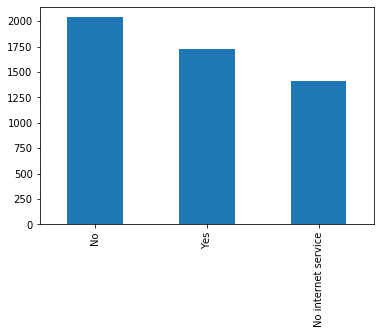

In [177]:
# Analysis- 2.5
#1 OnlineSecurity

final[final['Churn']=='No']['OnlineSecurity'].value_counts().plot(kind = 'bar')

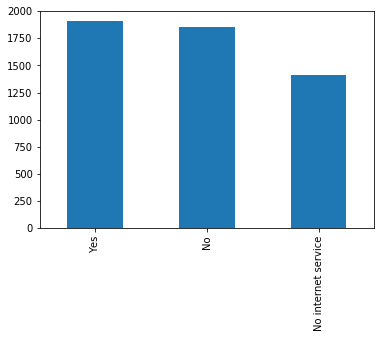

In [178]:
# Analysis- 2.5
#2 OnlineBackup

final[final['Churn']=='No']['OnlineBackup'].value_counts().plot(kind = 'bar')

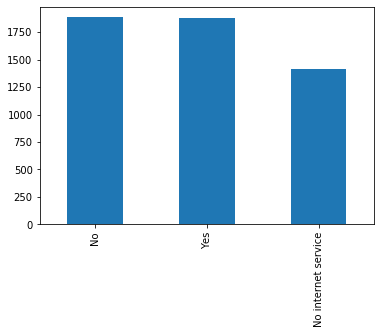

In [179]:
# Analysis- 2.5
#3 Deviceprotection

final[final['Churn']=='No']['DeviceProtection'].value_counts().plot(kind = 'bar')

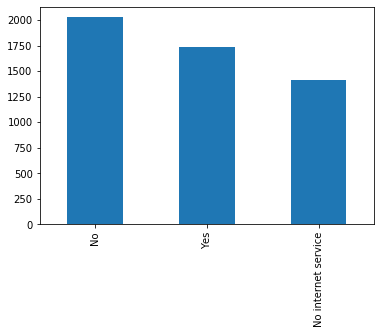

In [180]:
# Analysis- 2.5
#4 Techsupport

final[final['Churn']=='No']['TechSupport'].value_counts().plot(kind = 'bar')

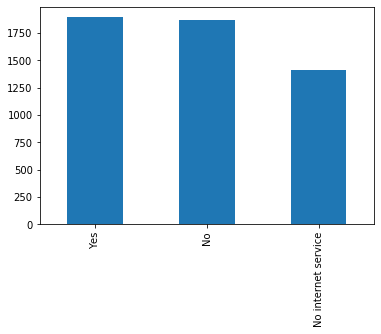

In [181]:
# Analysis- 2.5
#5 StreamingTV

final[final['Churn']=='No']['StreamingTV'].value_counts().plot(kind = 'bar')

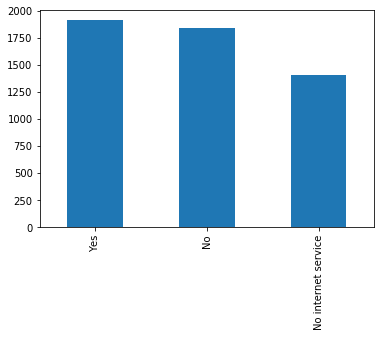

In [182]:
# Analysis- 2.5
#6 StreamingMovies

final[final['Churn']=='No']['StreamingMovies'].value_counts().plot(kind = 'bar')

In [1]:
# Analysis- 2.6

final.groupby(['PaymentMethod']).mean()

NameError: name 'final' is not defined

In [183]:
# Analysis- 2.7
final[final['Churn']=='No'].groupby('Partner')['MonthlyCharges'].mean()

Partner
No     57.271856
Yes    64.831742
Name: MonthlyCharges, dtype: float64

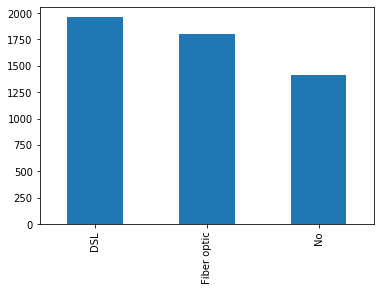

In [184]:
# Analysis- 2.8
final[final['Churn']=='No']['InternetService'].value_counts().plot(kind = 'bar')

In [185]:
# Analysis- 2.9
# Top 10 Customers
final[final['Churn']=='No'].sort_values(by = 'TotalCharges' , ascending = False)['customerID'][:10]

2845    9093-FPDLG
3353    4536-PLEQY
5598    6051-PTVNS
6646    8249-THVEC
1935    7297-DVYGA
348     6243-OZGFH
2715    0484-JPBRU
5842    2971-SGAFL
6994    0804-YGEQV
3949    4495-LHSSK
Name: customerID, dtype: object

In [186]:
# Analysis- 2.9
# Bottom 10 Customers
final[final['Churn']=='No'].sort_values(by = 'TotalCharges' , ascending = True)['customerID'][:10]

6754    2775-SEFEE
753     3115-CZMZD
4380    2520-SGTTA
5218    2923-ARZLG
1082    4367-NUYAO
1340    1371-DWPAZ
488     4472-LVYGI
936     5709-LVOEQ
3331    7644-OMVMY
3826    3213-VVOLG
Name: customerID, dtype: object

In [187]:
#Churn Analysis

In [188]:
churn = pd.read_csv("telcom.csv")
churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [189]:
#Analysis 
1.1
churn.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [190]:
# Analysis 2.1
churn.drop(['state', 'area code', 'phone number', 'customer service calls'], axis = 1, inplace = True)

In [191]:
# Analysis 2.2
churn['international plan'].replace(['yes', 'no'], [1,0], inplace = True)
churn['voice mail plan'].replace(['yes', 'no'], [1,0], inplace = True)

In [192]:
churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,False


In [193]:
# Analysis 2.3
x = churn.drop(['churn'], axis = 1)
y = churn['churn']

In [194]:
# Analysis 2.4
100*y.value_counts(normalize = True)

False    85.508551
True     14.491449
Name: churn, dtype: float64

In [195]:
# Analysis 2.5
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [196]:
# Analysis 2.6
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [197]:
# Analysis 2.7
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter = 1000, class_weight = 'balanced')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

0.765
0.7131147540983607


array([[678, 200],
       [ 35,  87]], dtype=int64)

In [198]:
logreg.coef_

array([[ 0.12891484,  1.8179821 , -1.2919478 ,  0.9431917 ,  1.45717792,
         0.37122942,  1.45688565,  0.58230443,  0.50645145,  0.58120625,
         0.50929162,  0.01689001,  0.50699207,  0.34929632, -0.98942401,
         0.35775623]])

In [203]:
feature_importance = pd.DataFrame({"Feature":x.columns.tolist(),"Coefficients":logreg.coef_[0]})
feature_importance.sort_values(by = 'Coefficients')

,Feature,Coefficients
2,voice mail plan,-1.291948
14,total intl calls,-0.989424
11,total night calls,0.016890
0,account length,0.128915
13,total intl minutes,0.349296
15,total intl charge,0.357756
5,total day calls,0.371229
8,total eve calls,0.506451
12,total night charge,0.506992
10,total night minutes,0.509292


In [ ]:
# Customer Segmentation

In [215]:
cluster = churn[['total day calls', 'total night calls', 'total eve calls', 'total intl calls']]
cluster.head()

,total day calls,total night calls,total eve calls,total intl calls
0,110,91,99,3
1,123,103,103,3
2,114,104,110,5
3,71,89,88,7
4,113,121,122,3


In [216]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total day calls    3333 non-null   int64
 1   total night calls  3333 non-null   int64
 2   total eve calls    3333 non-null   int64
 3   total intl calls   3333 non-null   int64
dtypes: int64(4)
memory usage: 104.3 KB


In [217]:
# Analysis-1.2
# Here we need to scale the cluster data as created in the previous step
# We will be using min-max scaler
# You are not required to write any code over here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cluster_scale = scaler.fit_transform(cluster)

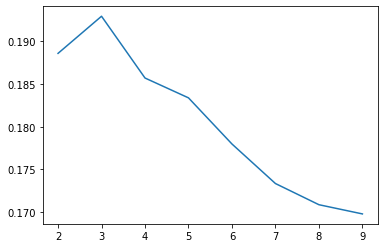

In [218]:
# Analysis-2.1
# Here you need to check the silhouette curve
# Here you don't need to write any code
# Mention your inference about the plot

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(cluster_scale)
    sse_.append([k, silhouette_score(cluster_scale, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

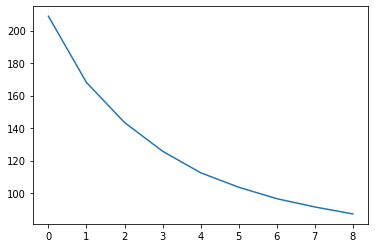

In [219]:
# Analysis-2.2
# Here you need to check the elbow curve
# Here you don't need to write any code
# Mention your inference about the plot

ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters)
    model_clus.fit(cluster_scale)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [220]:
cluster_kmean = KMeans(n_clusters = 3, random_state = 0)
cluster_kmean.fit(cluster_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
cluster['labels'] = cluster_kmean.labels_

In [223]:
cluster.head()

,total day calls,total night calls,total eve calls,total intl calls,labels
0,110,91,99,3,0
1,123,103,103,3,1
2,114,104,110,5,1
3,71,89,88,7,2
4,113,121,122,3,1


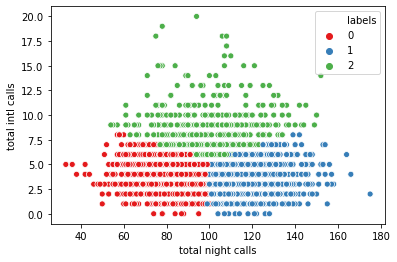

In [226]:
sns.scatterplot(x='total night calls',y='total intl calls',hue='labels',legend='full',data= cluster, palette = 'Set1')

In [227]:
cluster.groupby('labels').mean()

,total day calls,total night calls,total eve calls,total intl calls
labels,,,,
0,100.893731,83.096330,98.987768,3.571101
1,100.041789,116.441349,101.230938,3.550587
2,100.341906,100.065053,100.039334,8.193646


In [ ]:
# Employee Satisfaction

In [210]:
emp = pd.read_csv("employee.csv")
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
